In [70]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [3]:
file = open("data.pkl", "rb")

In [4]:
data = pickle.load(file)

In [5]:
file.close()

In [6]:
type(data)

numpy.ndarray

In [67]:
data.shape

(5000, 2)

Creating a dataframe using the data with two columns for X and Y values


In [7]:
df = pd.DataFrame(data=data, columns=['X','Y'])
df_values=df.values
df.head(5)

,X,Y
0,0.000,2.000000
1,0.001,2.026000
2,0.002,2.051997
3,0.003,2.077990
4,0.004,2.103975


Dividing the data into training and testing data while shuffling the data to create random splits later on 

In [8]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(df_values[:,0], df_values[:,1], test_size=0.1,random_state=10,shuffle=True)

Creating a dataframe with the training data

In [9]:
df_train=pd.DataFrame({'X_train':xtr, 'Y_train':ytr})

Dividing the randomized training data into 10 splits 

In [10]:
df_train_splits=np.split(df_train,10)

In [11]:
type(df_train_splits)

list

In [12]:
df_train_splits[0].head(5)

,X_train,Y_train
0,1.731,1.772402
1,3.096,1.560539
2,1.464,5.197280
3,0.470,0.787319
4,0.454,0.802767


In [13]:
for i in range(10):
  df_train_splits[i]=df_train_splits[i].values

Creating 9 linear Regression models, one for each polynomial degree

In [14]:
model1=linear_model.LinearRegression()
model2=linear_model.LinearRegression()
model3=linear_model.LinearRegression()
model4=linear_model.LinearRegression()
model5=linear_model.LinearRegression()
model6=linear_model.LinearRegression()
model7=linear_model.LinearRegression()
model8=linear_model.LinearRegression()
model9=linear_model.LinearRegression()
models=[]
models.append(model1)
models.append(model2)
models.append(model3)
models.append(model4)
models.append(model5)
models.append(model6)
models.append(model7)
models.append(model8)
models.append(model9)


For each polynomial degree, we loop over the 10 training sets and train the model then use it to predict the test values and add the predictions to an array for further use.

Also the bias and variance are calculated for each model order along the 10 datasets and two 9*10 matrices are used,
one for bias and one for variance

In [35]:
bias_all = np.zeros((9,10))
var_all = np.zeros((9,10))
predictions_all=[]
for i in range(0,9,1):
  poly = PolynomialFeatures(degree = i+1)
  for j in range(0,10,1):
    X=df_train_splits[j][:,0].reshape(-1,1)
    y_train=df_train_splits[j][:,1].reshape(-1,1)
    X_train_poly=poly.fit_transform(X)
    X_test_poly=poly.fit_transform(xts.reshape(-1,1))
    models[i].fit(X_train_poly, y_train)
    y_predict=models[i].predict(X_test_poly)
    bias=np.mean((y_predict-yts.reshape(-1,1))**2)
    var=np.mean((y_predict-np.mean(y_predict))**2)
    bias_all[i,j]=bias
    var_all[i,j]=var
    predictions_all.append(y_predict)


Plotting the actual data vs the predicted for each polynomial degree using one dataset

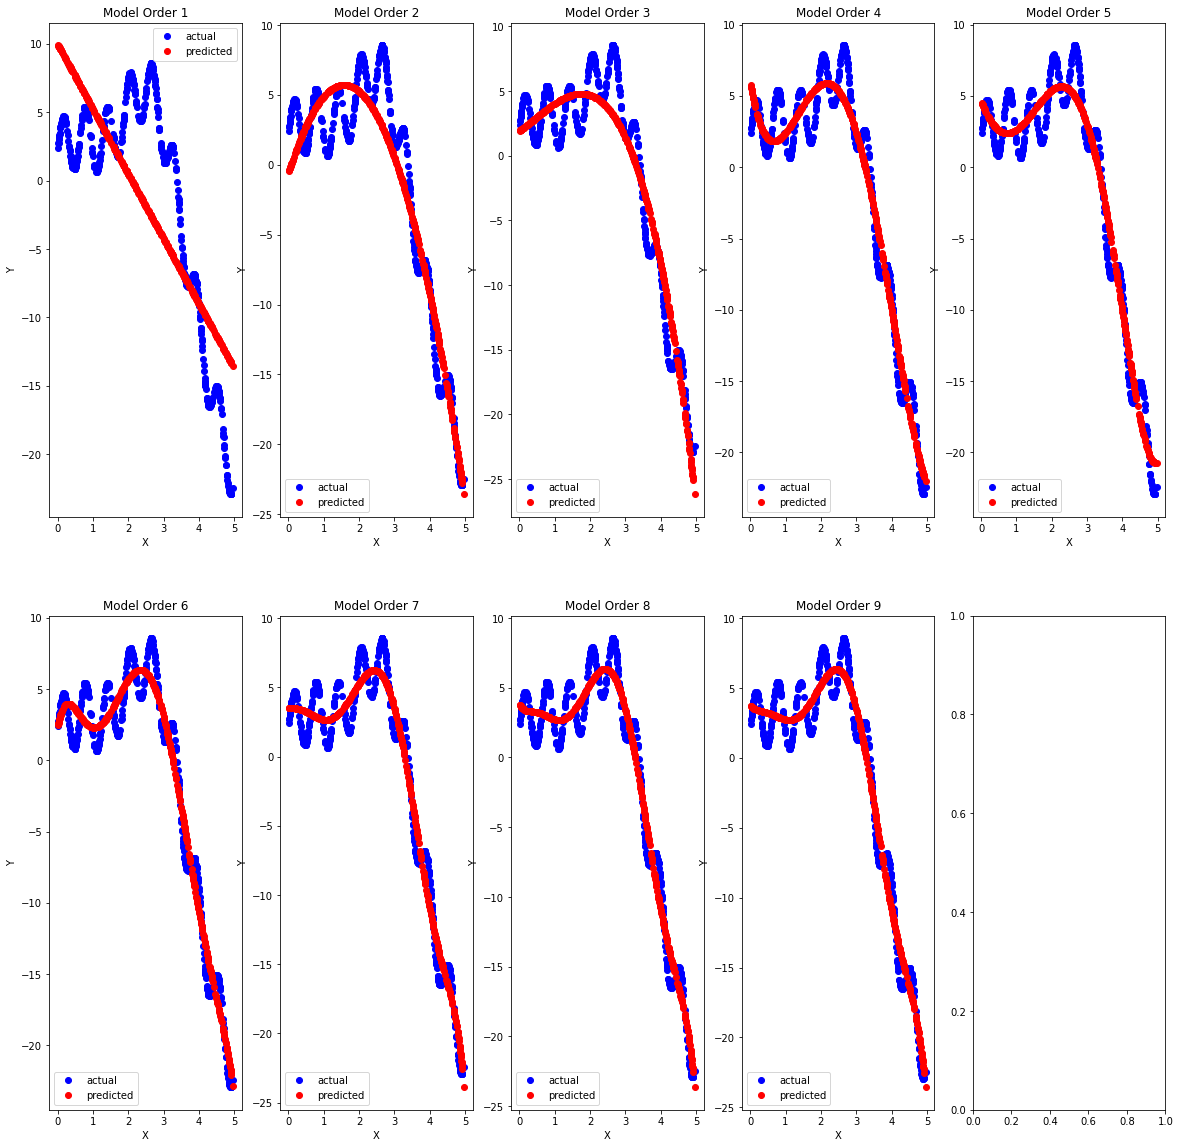

In [66]:
figure, axis = plt.subplots(2, 5,figsize=(20,20))
axis[0, 0].plot(xts,yts,'o',color='blue')
axis[0, 0].plot(xts,predictions_all[0],'o',color='red')
axis[0, 0].set_xlabel('X')
axis[0, 0].set_ylabel('Y')
axis[0, 0].set_title('Model Order 1')
axis[0,0].legend(['actual','predicted'])

axis[0, 1].plot(xts,yts,'o',color='blue')
axis[0, 1].plot(xts,predictions_all[10],'o',color='red')
axis[0, 1].set_xlabel('X')
axis[0, 1].set_ylabel('Y')
axis[0, 1].set_title('Model Order 2')
axis[0,1].legend(['actual','predicted'])

axis[0, 2].plot(xts,yts,'o',color='blue')
axis[0, 2].plot(xts,predictions_all[20],'o',color='red')
axis[0, 2].set_xlabel('X')
axis[0, 2].set_ylabel('Y')
axis[0, 2].set_title('Model Order 3')
axis[0,2].legend(['actual','predicted'])

axis[0, 3].plot(xts,yts,'o',color='blue')
axis[0, 3].plot(xts,predictions_all[30],'o',color='red')
axis[0, 3].set_xlabel('X')
axis[0, 3].set_ylabel('Y')
axis[0, 3].set_title('Model Order 4')
axis[0,3].legend(['actual','predicted'])

axis[0, 4].plot(xts,yts,'o',color='blue')
axis[0, 4].plot(xts,predictions_all[40],'o',color='red')
axis[0, 4].set_xlabel('X')
axis[0, 4].set_ylabel('Y')
axis[0, 4].set_title('Model Order 5')
axis[0,4].legend(['actual','predicted'])

axis[1, 0].plot(xts,yts,'o',color='blue')
axis[1, 0].plot(xts,predictions_all[50],'o',color='red')
axis[1, 0].set_xlabel('X')
axis[1, 0].set_ylabel('Y')
axis[1, 0].set_title('Model Order 6')
axis[1,0].legend(['actual','predicted'])

axis[1, 1].plot(xts,yts,'o',color='blue')
axis[1, 1].plot(xts,predictions_all[60],'o',color='red')
axis[1, 1].set_xlabel('X')
axis[1, 1].set_ylabel('Y')
axis[1, 1].set_title('Model Order 7')
axis[1,1].legend(['actual','predicted'])

axis[1, 2].plot(xts,yts,'o',color='blue')
axis[1, 2].plot(xts,predictions_all[70],'o',color='red')
axis[1, 2].set_xlabel('X')
axis[1, 2].set_ylabel('Y')
axis[1, 2].set_title('Model Order 8')
axis[1,2].legend(['actual','predicted'])

axis[1, 3].plot(xts,yts,'o',color='blue')
axis[1, 3].plot(xts,predictions_all[80],'o',color='red')
axis[1, 3].set_xlabel('X')
axis[1, 3].set_ylabel('Y')
axis[1, 3].set_title('Model Order 9')
axis[1,3].legend(['actual','predicted'])


In [36]:
models_bias=[]
models_variance=[]

Calculating the average bias and variance for each polynomial degree using the 10 training datasets

In [37]:
for i in range(9):
  models_bias.append(np.mean(bias_all[i]))
  models_variance.append(np.mean(var_all[i]))

In [39]:
models_variance

[45.84318968130683,
 66.02272747230373,
 66.07462308881364,
 70.69056330983072,
 71.29744606562585,
 71.2830646713483,
 71.55188788553599,
 71.67593296910276,
 71.78279272288752]

In [41]:
models_orders=np.arange(1,10)
models_orders

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Plotting the bias-variance tradeoff graph for the model orders


Text(0.5, 1.0, 'Bias-Variance TradeOff')

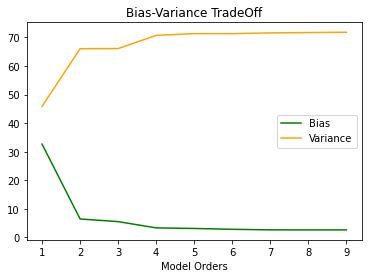

In [68]:
plt.plot(models_orders,models_bias,color='green')
plt.plot(models_orders,models_variance,color='orange')
plt.xlabel('Model Orders')
plt.legend(['Bias','Variance'])
plt.title('Bias-Variance TradeOff')

In [44]:
pip install prettytable 

In [45]:
from prettytable import PrettyTable 

Tabulating the results for the bias and variance for each model order

In [49]:
model_bias_var = PrettyTable(["Model Order", "Bias", "Variance"])
for i in range(9):
  model_bias_var.add_row([models_orders[i],models_bias[i],models_variance[i]])
print(model_bias_var) 

+-------------+--------------------+-------------------+
| Model Order |        Bias        |      Variance     |
+-------------+--------------------+-------------------+
|      1      | 32.65279475463687  | 45.84318968130683 |
|      2      | 6.451925360777691  | 66.02272747230373 |
|      3      | 5.531333365628761  | 66.07462308881364 |
|      4      | 3.3416919610855755 | 70.69056330983072 |
|      5      | 3.1344471448793496 | 71.29744606562585 |
|      6      |  2.84375956972154  |  71.2830646713483 |
|      7      | 2.651668591653127  | 71.55188788553599 |
|      8      | 2.6299380616513623 | 71.67593296910276 |
|      9      | 2.6353376235263934 | 71.78279272288752 |
+-------------+--------------------+-------------------+


***REPORT:***

As shown in the graph, the bias tends to decrease upon increasing the order of the model.
The change is big between the first and second orders (from 32 to 6) then it is not as big as the order increases. 

As opposed to the bias, the variance keeps increasing as the model order increases. 

Conclusion:
As the model order increases, the bias decreases and the variance increases, but as the model order gets higher overfitting occurs as the drawn curve tries to fit all the data points. 
Therefore, the ideal model order to use here would between the second and the third